---
title: 経済的発注量
format:
  html:
    code-fold: true
jupyter: python3
---

**経済的発注量**（EOQ: Economic Order Quantity）モデルは、最も基本的な在庫管理モデルの一つである。[Harris](https://doi.org/10.1287/opre.38.6.947)は1913年、このモデルを最初に提案した。

EOQモデルは、単位時間あたりの需要量は決定論的で、一定であると仮定する。すなわち、需要量は事前に分かっており、時間とともに変化しない。単位時間あたりの需要量は需要率（demand rate）と呼ばれ、記号 $d$ で表される。リードタイムは0とし、発注から納品までの時間はないと仮定する。一回の発注量を $Q$ とし、一定であるとする。欠品は許せないとする。全ての需要は満されなければならない。また、EOQモデルでは、在庫量は連続的に観測され、いつでも発注が可能であるとする。

在庫に関わる費用は、発注費用 $K$、保管費用 $h$ と、購入費用（購入単価を $c$ と表す）がある。

EOQモデルの最適解は次の二つの性質を持つ[(Snyder & Shen, 2019)](https://doi.org/10.1002/9781119584445)：

1. Zero-inventory ordering (ZIO). 在庫量が0のときに発注を行う。リードタイムは0であるため、在庫量が0でないときに発注すると、保管費用が発生する。
2. Constant order sizes. 発注量は一定である。需要率 $d$ が一定であり、在庫量が0のときに発注を行うため、最適発注量も一定である。

以上の性質から、在庫量の時間的変化は下図のようになる。

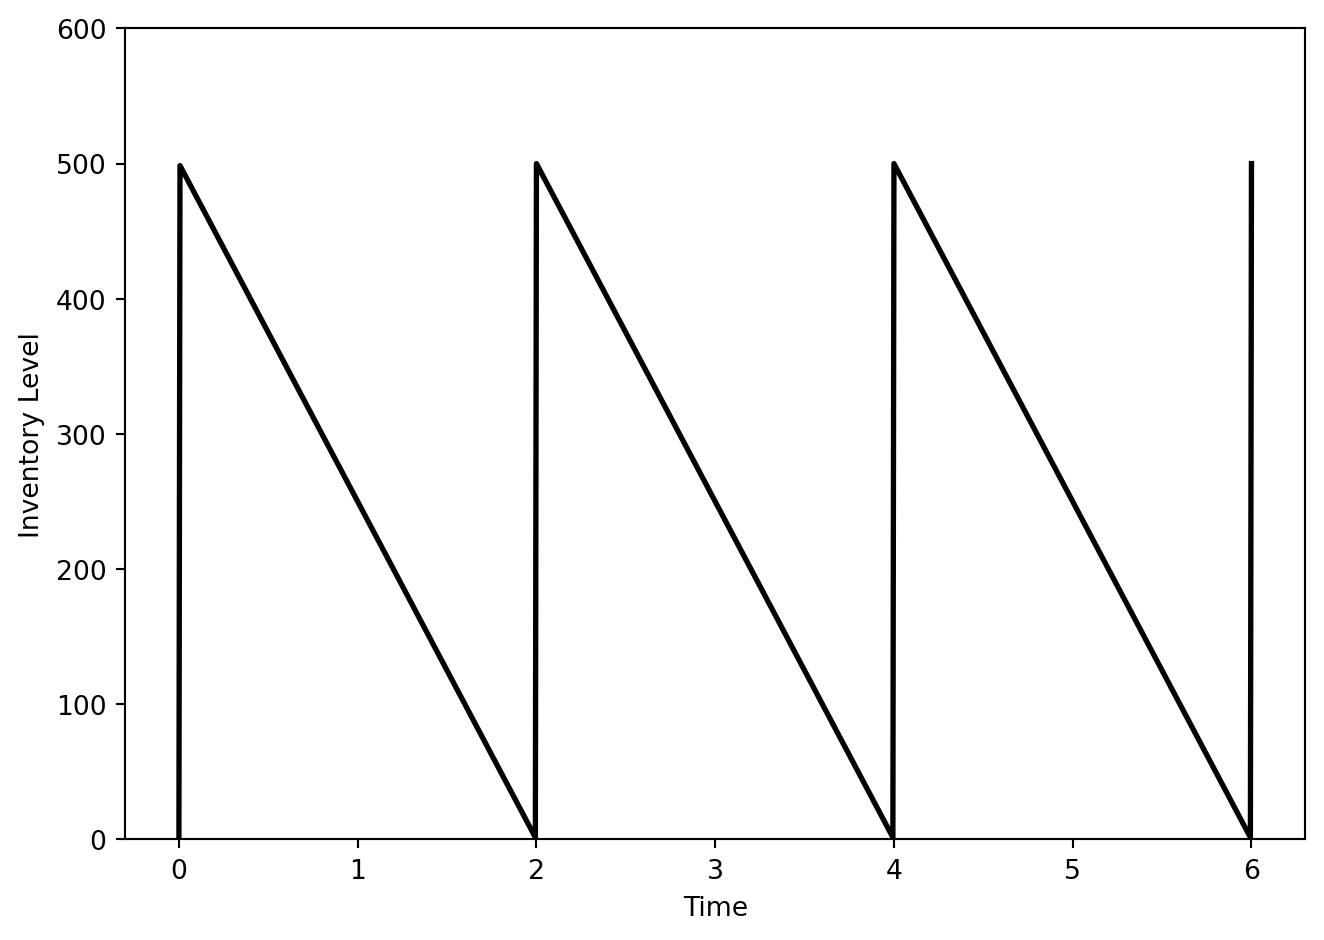

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
d = 250  # Demand rate
Q = 500  # Order quantity
T = Q / d  # Cycle length
t = np.linspace(0, 3 * T, 1000)  # Time from 0 to 3 cycles

# Inventory level over time
inventory = np.maximum(0, Q - (d * t) % Q)
inventory[0] = 0

# Plotting the inventory level
plt.plot(t, inventory, label="Inventory Level", color="black", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Inventory Level")
plt.axhline(0, color="gray", linewidth=1)
plt.ylim(bottom=0, top=Q + 100)
plt.tight_layout()
plt.show()

発注の間隔を**サイクル**(cycle)と呼び、サイクル期間は 

$$
T = \frac{Q}{d}
$$

で与えられる。

:::{prf:example}
:label: example:eoq_cycle

A社は、毎月250個の需要がある商品を取り扱っている。一回の発注量は500個とし、サイクル期間は

$$
T = \frac{500}{250} = 2 \text{ヶ月}
$$

となる。
:::

### コスト関数

ここでは、1サイクルあたりのコストを考える。

**発注費用**：発注は1回だけ行うため、発注費用は $K$ である。

**購入費用**：$Q$ 個の商品を単価 $c$ で購入するため、購入費用は $cQ$ である。

**保管費用**：在庫量はサイクル期間 $T$ の間に $Q$ 個から0個まで減少するため、平均在庫量は $\frac{Q}{2}$ である。したがって、平均保管費用は $\frac{hQ}{2}$ である。サイクル期間 $T$ は $\frac{Q}{d}$ であるため、1サイクルあたりの保管費用は

$$
\frac{hQ}{2} \cdot T = \frac{hQ^2}{2d}
$$

となる。

以上より、1サイクルあたりのコストは次のように表される。

$$
K + cQ + \frac{hQ^2}{2d}
$$

平均コストは、これをサイクル期間 $T$ で割ったものとして定義される。したがって、平均コスト $g(Q)$ は次のように表される。

$$
\begin{align*}
g(Q) &= \frac{1}{T} \left( K + cQ + \frac{hQ^2}{2d} \right) \\
&= \frac{d}{Q} \left( K + cQ + \frac{hQ^2}{2d} \right) \\
&= \frac{Kd}{Q} + c d + \frac{hQ}{2}
\end{align*}
$$

以上より、平均コストは発注量 $Q$ の関数として次のように表される。

$$
g(Q) = \frac{Kd}{Q} + cd + \frac{hQ}{2}
$$


### 最適発注量

EOQモデルの目的は、平均コスト $g(Q)$ を最小化する発注量 $Q$ を求めることである。

平均コストの導関数 $g'(Q)$ が 0 となる点を求めることで、最適発注量 $Q^*$ を求めることができる。

$$
g'(Q) = -\frac{Kd}{Q^2} + \frac{h}{2} = 0
$$

これを解くと、最適発注量

$$
Q^* = \sqrt{\frac{2Kd}{h}}
$$

を得る。これをEOQ公式（EOQ formula）と呼ぶ。$Q^*$ を経済的発注量と呼ぶ（経済的は最適という意味である）。

:::{prf:observation}
:label: observation:eoq

1. $Q^*$ は $c$ には依存しない。
2. $h$ の増加に伴い、$Q^*$ は減少する。保管費用が高い場合は、少量で高い頻度で発注することが望ましい。
3. $K$ の増加に伴い、$Q^*$ は増加する。発注費用が高い場合は、多量で低い頻度で発注することが望ましい。
:::

二階導関数 $g''(Q)$ を求めて、最適発注量が最小値を与えることを確認する。

$$
g''(Q) = \frac{2Kd}{Q^3} > 0
$$

$g''(Q) > 0$ であるため、$Q^*$ は最小値を与える。

$Q^*$ を用いて、最適なサイクル期間 $T^*$ を求めることができる。

$$
T^* = \frac{Q^*}{d} = \sqrt{\frac{2K}{hd}}
$$

次の図は、発注コスト、保管コスト、平均コストの関係を示している。購入単価を $c = 0$ とする。

:::{code-cell} python
:tags: [remove-input]
# Parameters
K = 500  # Order cost
h = 15     # Holding cost
c = 0    # Purchase cost
Q = np.linspace(1, 50, 50)

# Average cost function
g = (K / Q) + c + (h * Q / 2)

# Plotting the costs vs order quantity
plt.figure(figsize=(12, 6))
plt.plot(Q, K / Q, label="Order Cost", color="blue", linewidth=2)
plt.plot(Q, c + (h * Q / 2), label="Holding Cost", color="orange", linewidth=2)
plt.plot(Q, g, label="Average Cost", color="green", linewidth=2)
plt.axvline(x=np.sqrt(2 * K / h), color="red", linestyle="--", label="Optimal Order Quantity", linewidth=2)
plt.xlabel("Order Quantity (Q)", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()  
:::

平均コストが最小となる発注量 $Q^*$ は、発注コストと保管コストの交差点である。すなわち、発注コストと保管コストを等しくする発注量は最適な発注量 $Q^*$ である。この性質は以下の式からわかる。

$$
\frac{Kd}{Q^*} = \frac{hQ^*}{2} \Longrightarrow Q^* = \sqrt{\frac{2Kd}{h}}
$$

:::{prf:observation}
:label: observation:eoq_cost

$Q$ の増加に伴い、平均発注コストは減少し、平均保管コストは増加する。逆もまた然りである。
:::

最適発注量 $Q^*$ を次の定理にまとめる。

:::{prf:theorem} Economic Order Quantity
:label: theorem:eoq

EOQモデルにおいて、最適発注量 $Q^*$ は

$$
Q^* = \sqrt{\frac{2Kd}{h}}
$$

で与えられる。

:::

:::{prf:example}
:label: example:eoq_1

ある電気量販店では、毎月250台のPCが販売されている。発注費用は5000円、保管費用は1台あたり月150円、購入単価は10万円とする。このとき、最適発注量 $Q^*$ は次のように求められる。

$$
Q^* = \sqrt{\frac{2 \cdot 5000 \cdot 250}{150}}
$$

最適発注量 $Q^*$ を次で計算する。

```{code-cell} python
def eoq(K, d, h):
    """
    Calculate the Economic Order Quantity (EOQ).
    
    Parameters:
    K (float): Order cost
    d (float): Demand rate
    h (float): Holding cost
    
    Returns:
    float: Optimal order quantity Q*
    """
    return np.sqrt(2 * K * d / h)

if __name__ == "__main__":
    K = 5000  # Order cost
    d = 250   # Demand rate (units per month)
    h = 150   # Holding cost (per unit per month)
    
    Q_star = eoq(K, d, h)
    print(f"Optimal Order Quantity (Q*): {Q_star:.2f}")
```

PCの場合は、注文量が整数である必要があるため、$g(129)$ と $g(130)$ を比較して最適発注量を決定する。

:::

## リードタイム

EOQ モデルでは、リードタイムは0と仮定している。リードタイムが $L > 0$ の場合も、最適発注量 $Q^*$ も変換せず、$L$ 期間前に $Q^*$ を発注すればよい。

ここでは、$r$ を発注点（reorder point）とする。在庫量が $r$ になったときに発注を行う。リードタイム $L$ の間に需要が $dL$ 個あるため、発注点は次のように表される。

$$
r = dL
$$

:::{prf:example}
上の例で、リードタイムが一週間とし、一か月を4週間とすると、リードタイムは $L = 1/4$ となる。したがって、発注点は次のように求められる。

$$
r = dL = 250 \times \frac{1}{4} = 62.5
$$

PCの在庫量が63台になったときに発注を行う。
:::

## 他のEOQモデル

- バックオーダーを考慮したEOQモデル
- 数量割引（quantity discount）を考慮したEOQモデル
  - 総量割引（all-units discount）
  - 増分割引（incremental discount）